In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

импорт данных

In [2]:
data = pd.read_csv("../../data/TelcoCustomerChurn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
cat_col = []
def print_unique_col_values(data):
    for column in data:
        if data[column].dtypes=='object':
            cat_col.append(column)
            print(f'{column} : {data[column].unique()}')
print_unique_col_values(data)
print(cat_col)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecu

в данных много категориальных данных - их потребуется перевести в удобный вид

In [6]:
data[data.duplicated(['customerID'], keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
data = data.drop('customerID', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


customerID не нужен, т.к. не несет смысловой нагрузки и он уникальный для всех записей

In [8]:
data['TotalCharges'].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [9]:
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
1990.50     1
7362.90     1
346.45      1
306.60      1
6844.50     1
Name: count, Length: 6530, dtype: int64

In [11]:
data['TotalCharges'].isnull().sum()

np.int64(11)

In [12]:
data[data['tenure']==0].count()

gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges         0
Churn               11
dtype: int64

In [13]:
data[data.TotalCharges.isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


расходы нулевые только у новых клиентов (tenure=0)

In [14]:
data.loc[data.TotalCharges.isnull(), 'TotalCharges'] = 0
data['TotalCharges'].isnull().sum()

np.int64(0)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


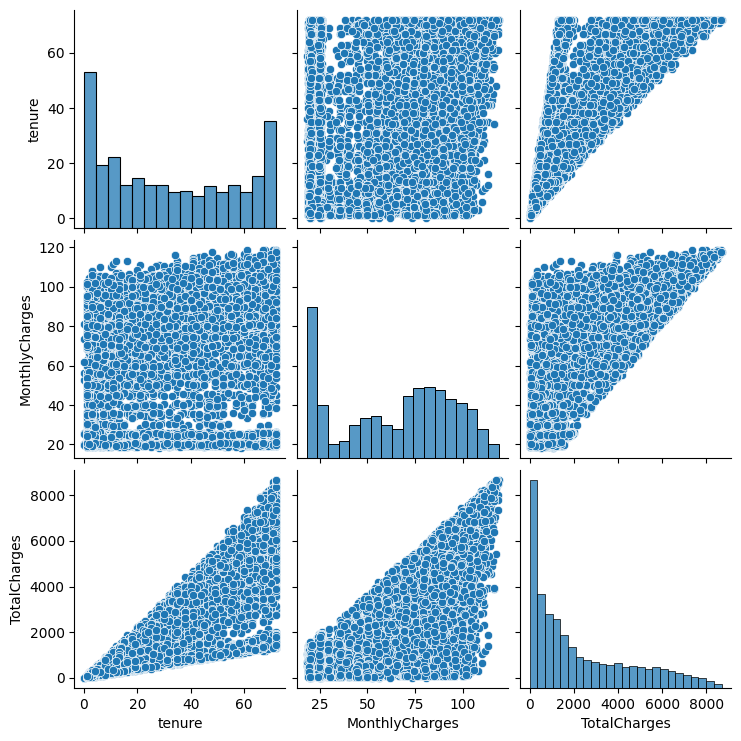

In [16]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns_plot = sns.pairplot(data[cols])

<Axes: xlabel='TotalCharges', ylabel='Count'>

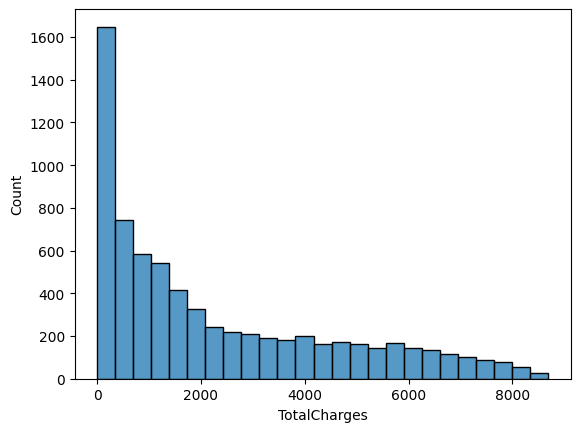

In [20]:
sns.histplot(data['TotalCharges'])

In [21]:
data[data['TotalCharges']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [22]:
data[data['TotalCharges']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 488 to 6754
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            11 non-null     object 
 1   SeniorCitizen     11 non-null     int64  
 2   Partner           11 non-null     object 
 3   Dependents        11 non-null     object 
 4   tenure            11 non-null     int64  
 5   PhoneService      11 non-null     object 
 6   MultipleLines     11 non-null     object 
 7   InternetService   11 non-null     object 
 8   OnlineSecurity    11 non-null     object 
 9   OnlineBackup      11 non-null     object 
 10  DeviceProtection  11 non-null     object 
 11  TechSupport       11 non-null     object 
 12  StreamingTV       11 non-null     object 
 13  StreamingMovies   11 non-null     object 
 14  Contract          11 non-null     object 
 15  PaperlessBilling  11 non-null     object 
 16  PaymentMethod     11 non-null     object 
 17  

In [23]:
data = data[data['TotalCharges']!=0]

решим что вновь прибывшие клиенты нам не помогут в анализе

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

<Axes: xlabel='TotalCharges', ylabel='Count'>

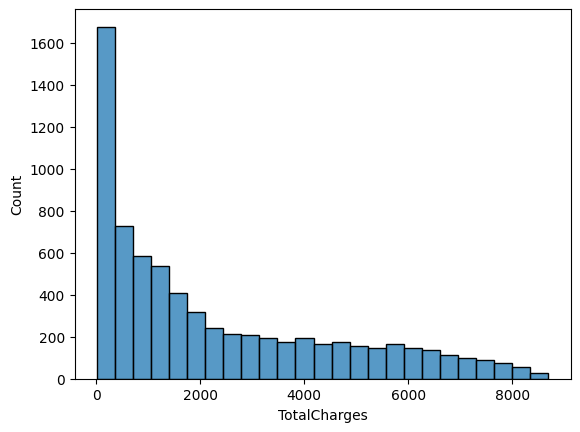

In [25]:
sns.histplot(data['TotalCharges'])

In [26]:
data[data['TotalCharges']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


<Axes: xlabel='TotalCharges', ylabel='Count'>

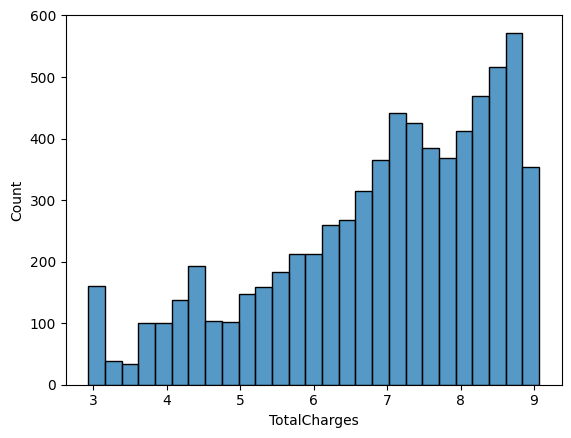

In [27]:
sns.histplot(np.log(data['TotalCharges']))

<Axes: xlabel='tenure', ylabel='Count'>

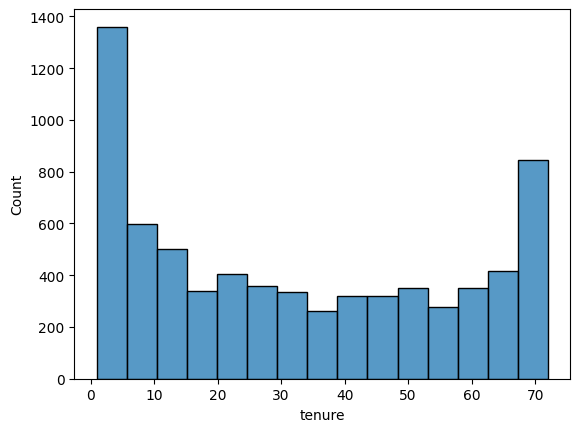

In [28]:
sns.histplot(data['tenure'])

<Axes: xlabel='tenure', ylabel='Count'>

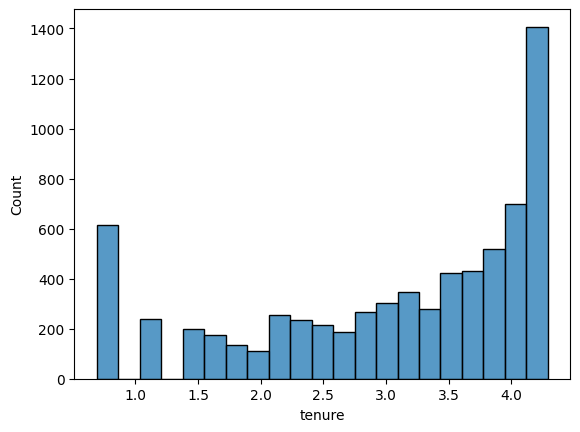

In [29]:
sns.histplot(np.log(data['tenure']+1))

<Axes: >

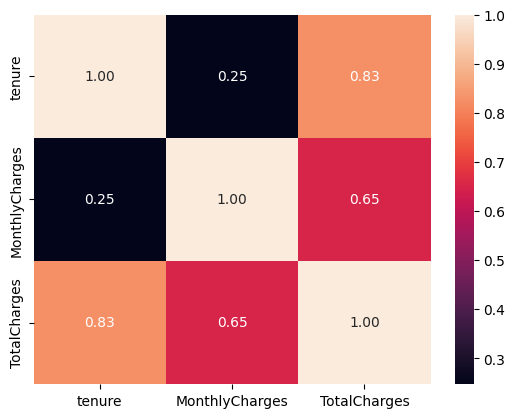

In [30]:
Corr=data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(Corr, annot=True, fmt='.2f')

по графику корреляции видно что срок владения сильно завязан на общие расходы, что логично

In [31]:
def one_way_tab (df, col):
    sns.countplot(x = col, data = df)
    plt.show();
    df = pd.crosstab(index = df[col], columns = "count")
    df['percent'] = df/df.sum() * 100
    return df

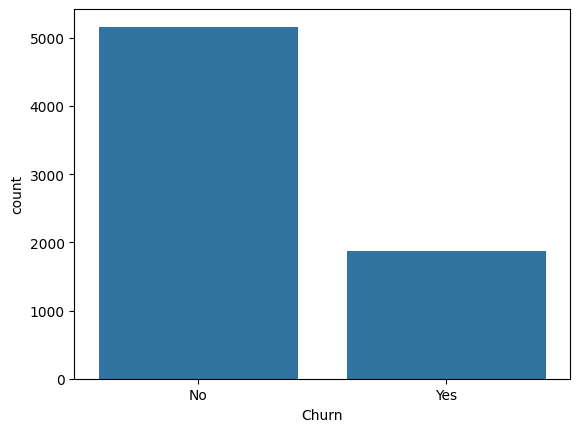

col_0,count,percent
Churn,,
No,5163,73.421502
Yes,1869,26.578498


In [32]:
one_way_tab(data, 'Churn')

посмотрим на целевую переменную - видно, что отток около 26-27%

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

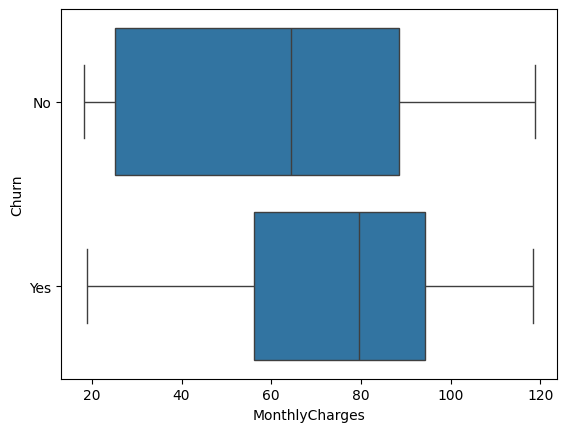

In [33]:
sns.boxplot(y="Churn", x="MonthlyCharges", data=data, orient="h")

видно что те кто хочет уйти платят больше плату в месяц

<Axes: xlabel='TotalCharges', ylabel='Churn'>

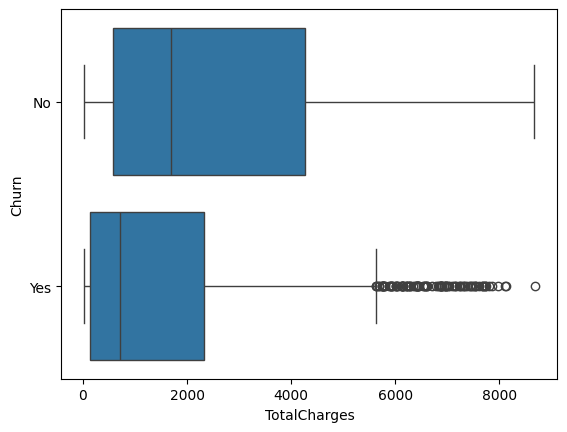

In [34]:
sns.boxplot(y="Churn", x="TotalCharges", data=data, orient="h")

также общие расходы у них меньше, но есть большие выбросы

<Axes: xlabel='tenure', ylabel='Churn'>

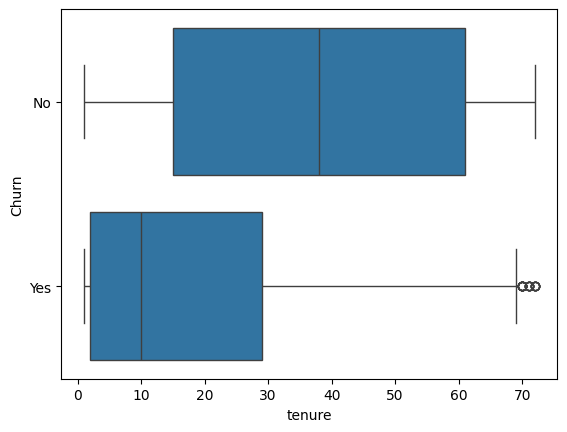

In [35]:
sns.boxplot(y="Churn", x="tenure", data=data, orient="h")

также видно, что те кто хочет уйти не так долго как правило пользуются услугами

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [37]:
print_unique_col_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


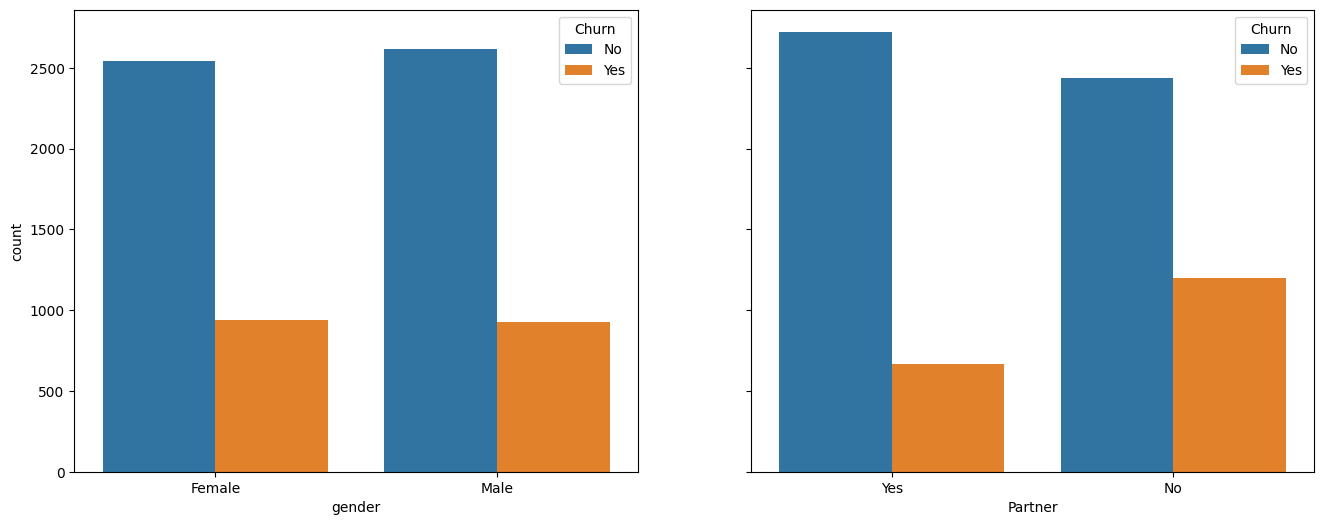

In [38]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='gender', hue='Churn', data=data, ax=axes[0]);
sns.countplot(x='Partner', hue='Churn', data=data, ax=axes[1]);

по полу получается равная ситуация, а по партнерству в большей степени хотят уйти те кто не являются партнерами

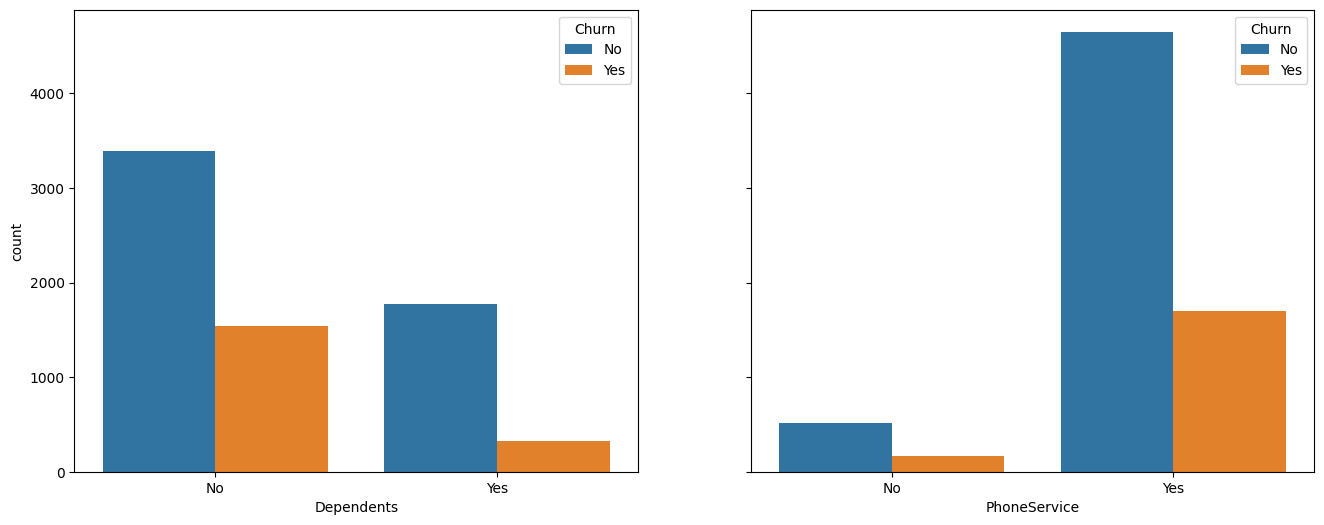

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='Dependents', hue='Churn', data=data, ax=axes[0]);
sns.countplot(x='PhoneService', hue='Churn', data=data, ax=axes[1]);

In [40]:
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / data.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=8, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

In [47]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


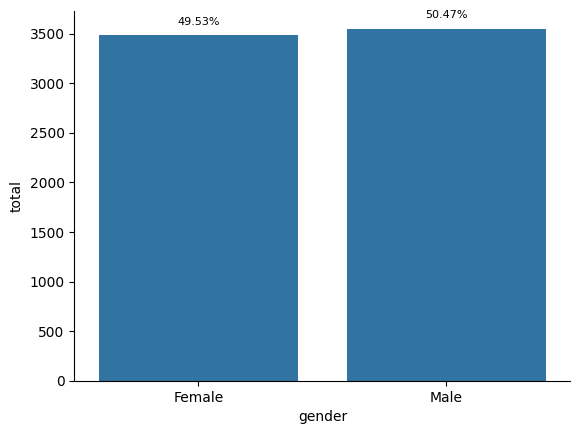

<Figure size 800x600 with 0 Axes>

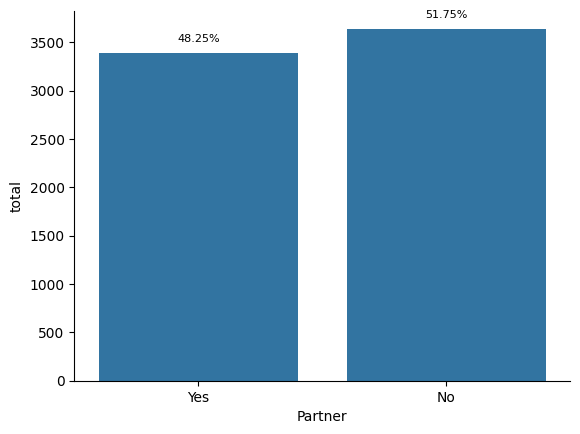

<Figure size 800x600 with 0 Axes>

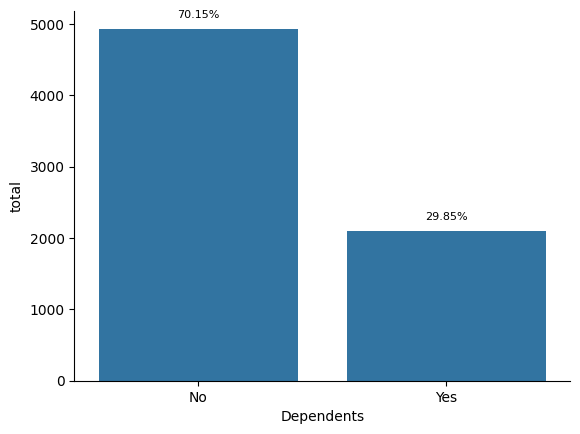

<Figure size 800x600 with 0 Axes>

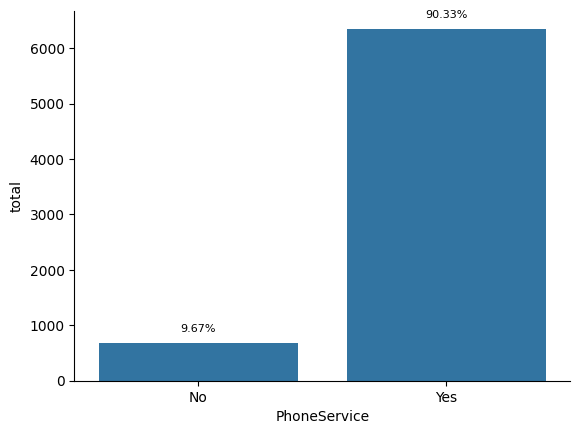

<Figure size 800x600 with 0 Axes>

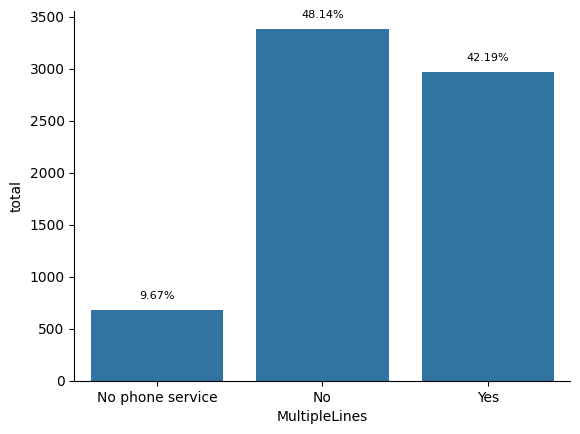

<Figure size 800x600 with 0 Axes>

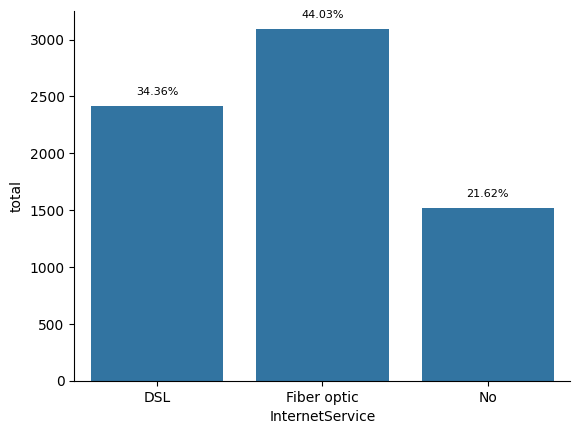

<Figure size 800x600 with 0 Axes>

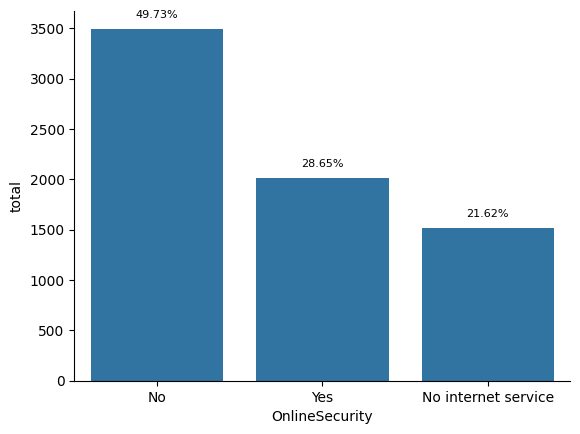

<Figure size 800x600 with 0 Axes>

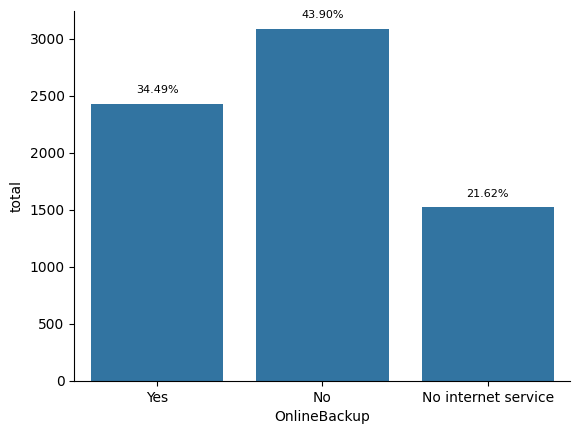

<Figure size 800x600 with 0 Axes>

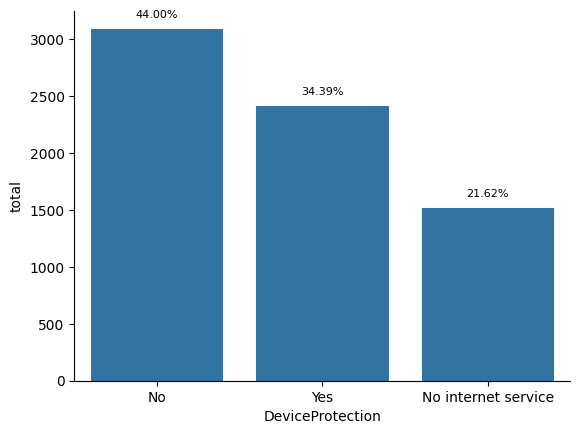

<Figure size 800x600 with 0 Axes>

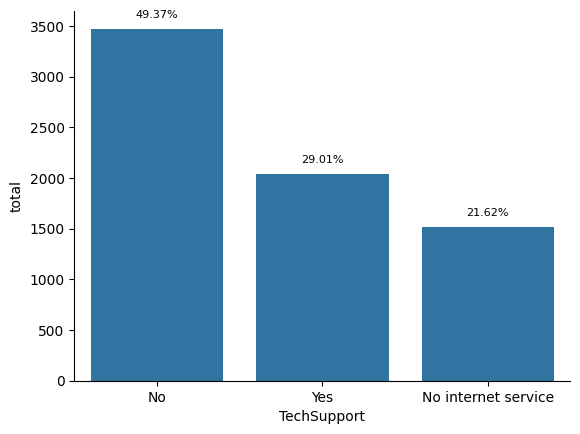

<Figure size 800x600 with 0 Axes>

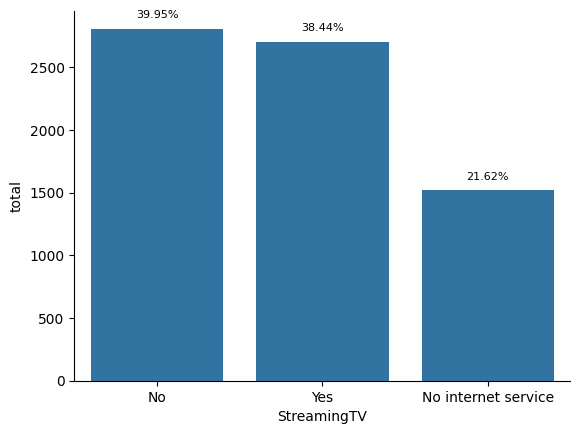

<Figure size 800x600 with 0 Axes>

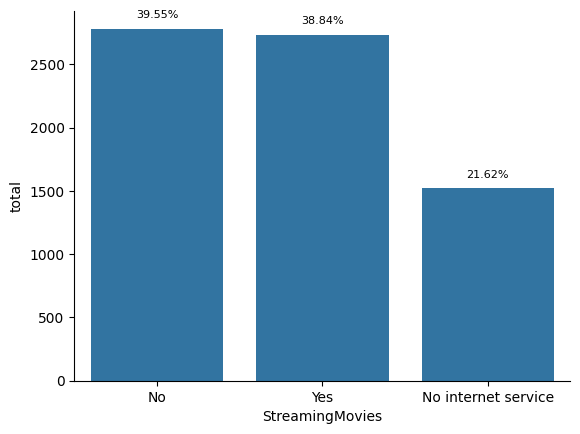

<Figure size 800x600 with 0 Axes>

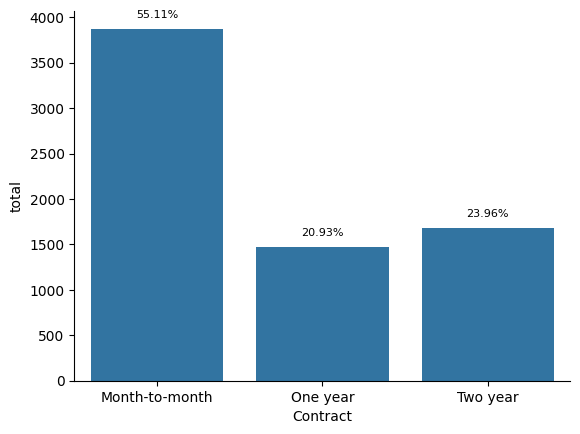

<Figure size 800x600 with 0 Axes>

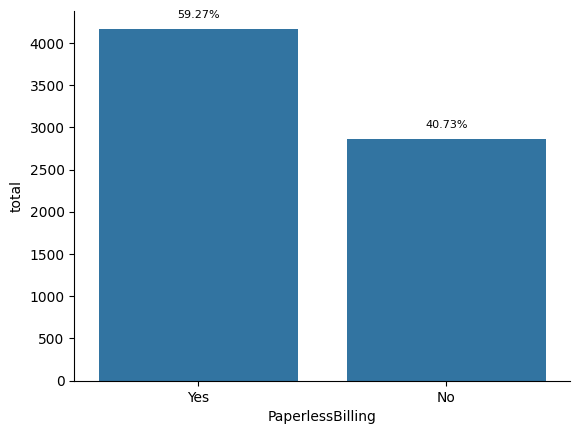

<Figure size 800x600 with 0 Axes>

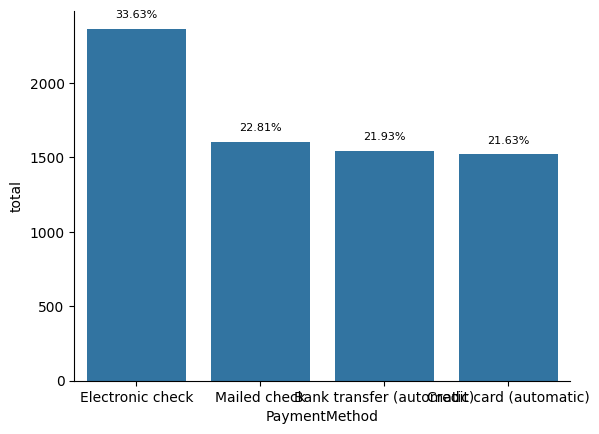

<Figure size 800x600 with 0 Axes>

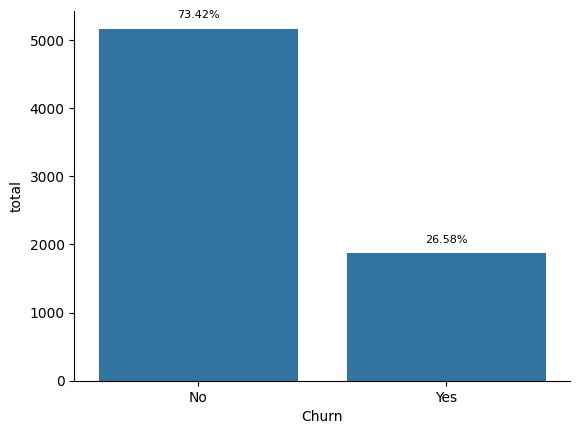

<Figure size 800x600 with 0 Axes>

In [48]:
def plot_hist(var):
    ax = sns.countplot(x = var,data = data)
    plt.ylabel("total")
    annot_plot(ax,0.09,1)
    plt.figure(figsize=(8, 6))
    plt.show()

strvar=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
        'Churn']
for n in strvar:
    plot_hist(n)

In [49]:
pd.crosstab(index = data["PhoneService"], columns = data["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,680,0
Yes,3385,0,2967


PhoneService связан с MultipleLines

In [50]:
pd.crosstab(index = data["InternetService"], columns = data["OnlineSecurity"])

OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,1240,0,1176
Fiber optic,2257,0,839
No,0,1520,0


In [51]:
pd.crosstab(index = data["InternetService"], columns = data["OnlineBackup"])

OnlineBackup,No,No internet service,Yes
InternetService,,,
DSL,1334,0,1082
Fiber optic,1753,0,1343
No,0,1520,0


In [52]:
pd.crosstab(index = data["InternetService"], columns = data["DeviceProtection"])

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,1355,0,1061
Fiber optic,1739,0,1357
No,0,1520,0


In [53]:
pd.crosstab(index = data["InternetService"], columns = data["TechSupport"])

TechSupport,No,No internet service,Yes
InternetService,,,
DSL,1242,0,1174
Fiber optic,2230,0,866
No,0,1520,0


In [54]:
pd.crosstab(index = data["InternetService"], columns = data["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1463,0,953
Fiber optic,1346,0,1750
No,0,1520,0


In [55]:
pd.crosstab(index = data["InternetService"], columns = data["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,1436,0,980
Fiber optic,1345,0,1751
No,0,1520,0


от InternetService зависят StreamingMovies, StreamingTV, OnlineBackup, TechSupport,
DeviceProtection, OnlineSecurity

In [56]:
data['InternetService'].replace('No','IS_NO',inplace=True)
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)
print_unique_col_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'IS_NO']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [57]:
data.replace('Yes',1,inplace=True)
data.replace('No',0,inplace=True)
print_unique_col_values(data)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'IS_NO']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [58]:
data.replace('Male',1,inplace=True)
data.replace('Female',0,inplace=True)
print_unique_col_values(data)

InternetService : ['DSL' 'Fiber optic' 'IS_NO']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [59]:
to_dummies = ['InternetService', 'Contract', 'PaymentMethod'
]

In [60]:
data = pd.get_dummies(data, columns=to_dummies)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [62]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_IS_NO,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [63]:
data.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingTV                                0.063254
StreamingMovies                            0.060860
MultipleLines                              0.040033
PhoneService                               0.011691
gender                                    -0.008545
DeviceProtection                          -0.066193
OnlineBackup                              -0.082307
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
InternetService_DSL                       -0.124141
PaymentMethod_Credit card (automatic)     -0.134687
Partner                                   -0.149982
Dependents  

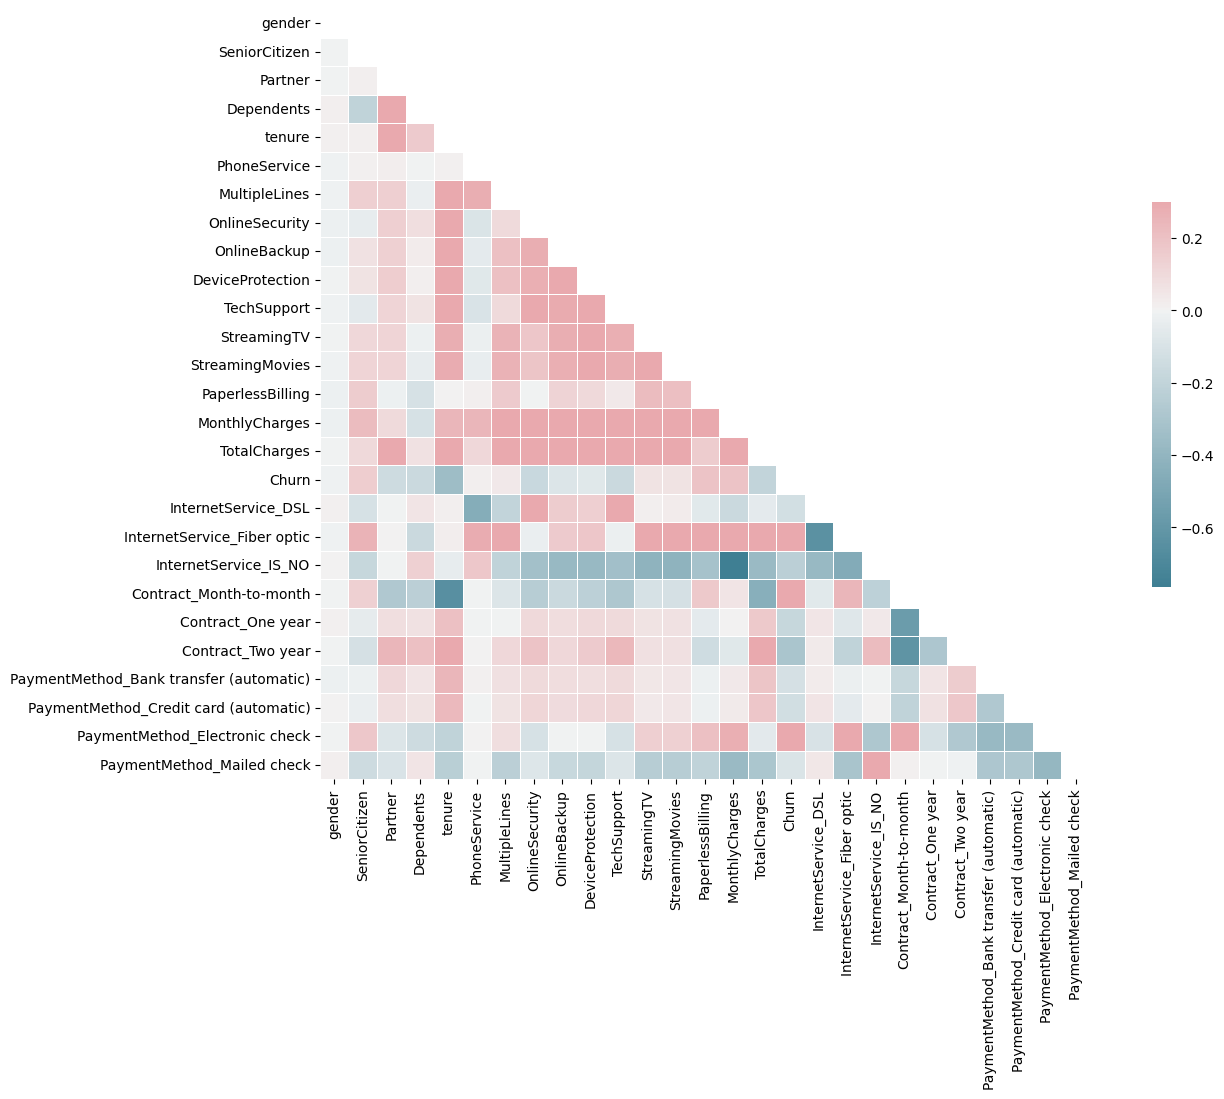

In [64]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})
plt.show();

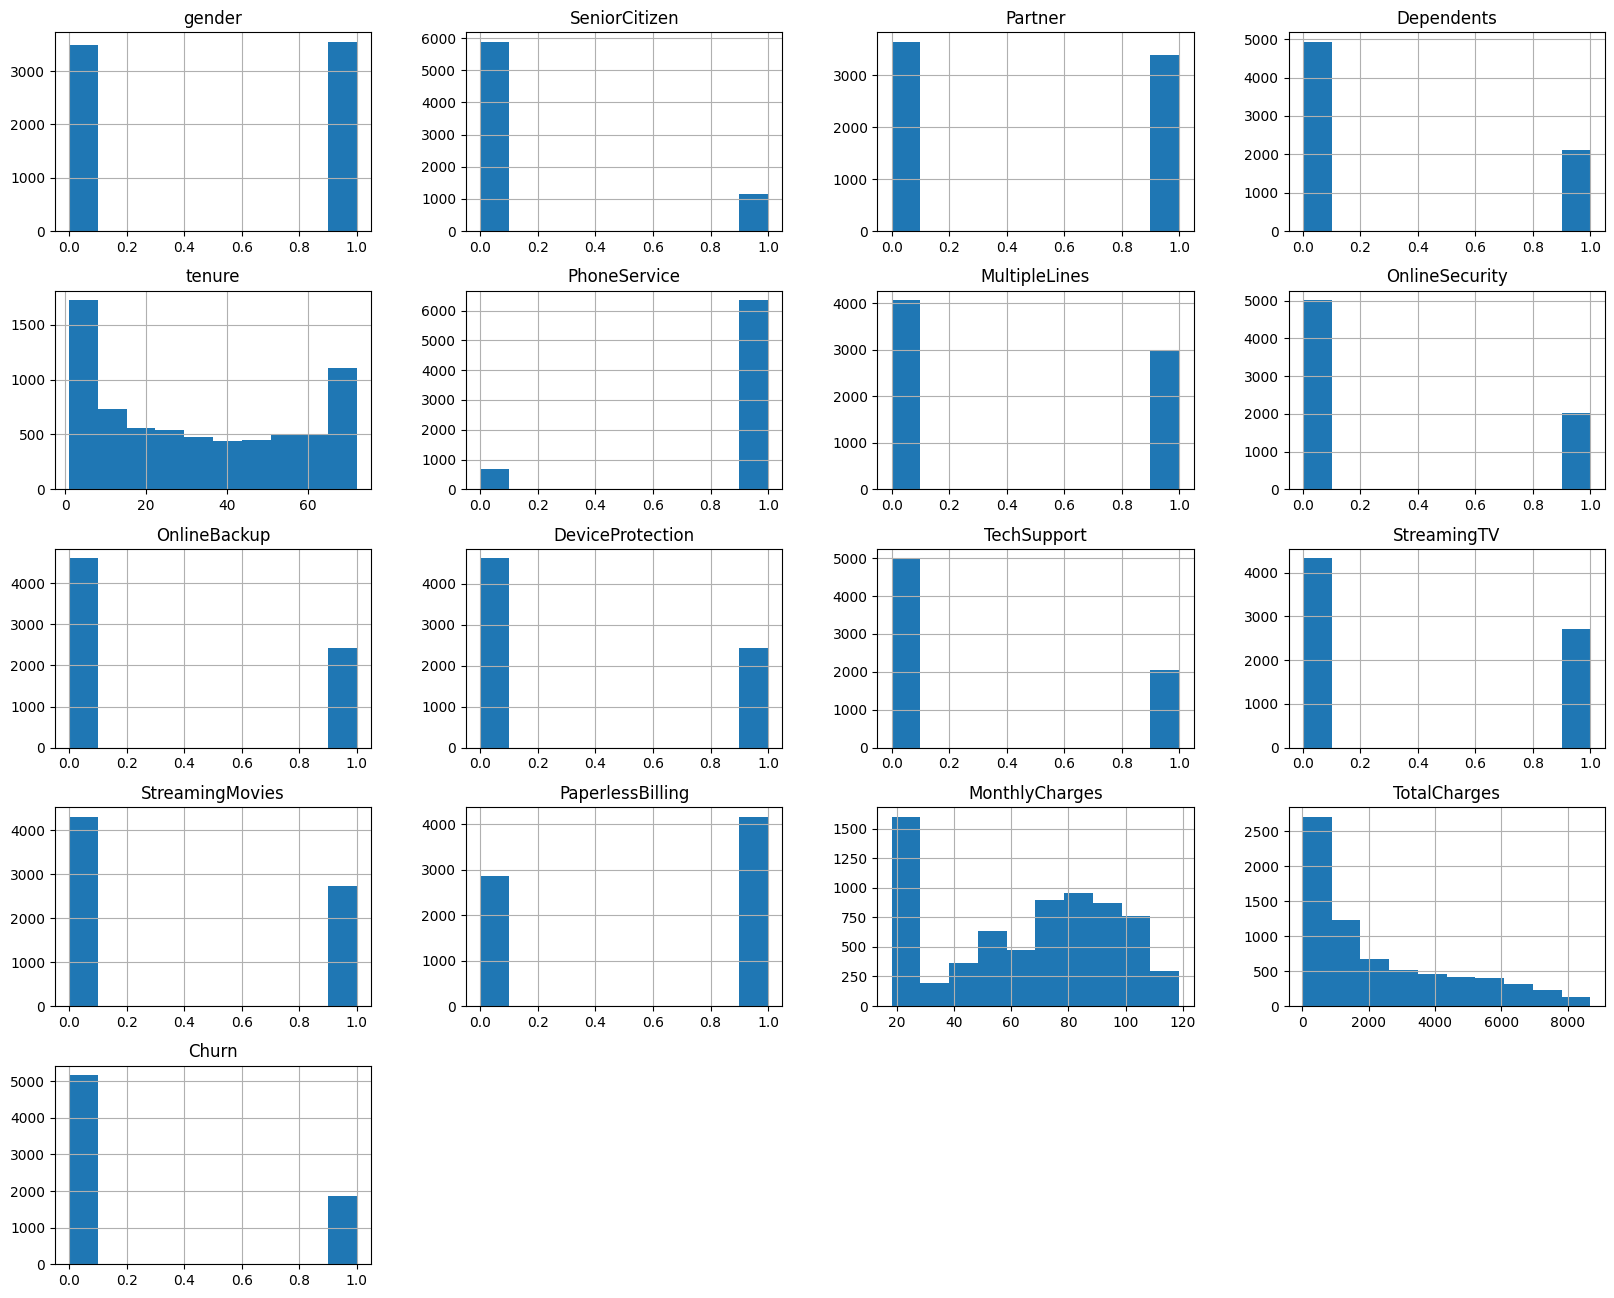

In [65]:
data.hist(figsize=(20,16))
plt.show()

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

данные сильно несбалансированы в части Churn и PhoneService, SeniorCitizen

In [67]:
zero  = data[data['Churn']==0]
one = data[data['Churn']==1]
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 5000) 
data = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data)

In [68]:
zero  = data[data['SeniorCitizen']==0]
one = data[data['SeniorCitizen']==1]
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 6000) 
data = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data)

In [69]:
zero  = data[data['PhoneService']==0]
one = data[data['PhoneService']==1]
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 4000) 
data = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data)

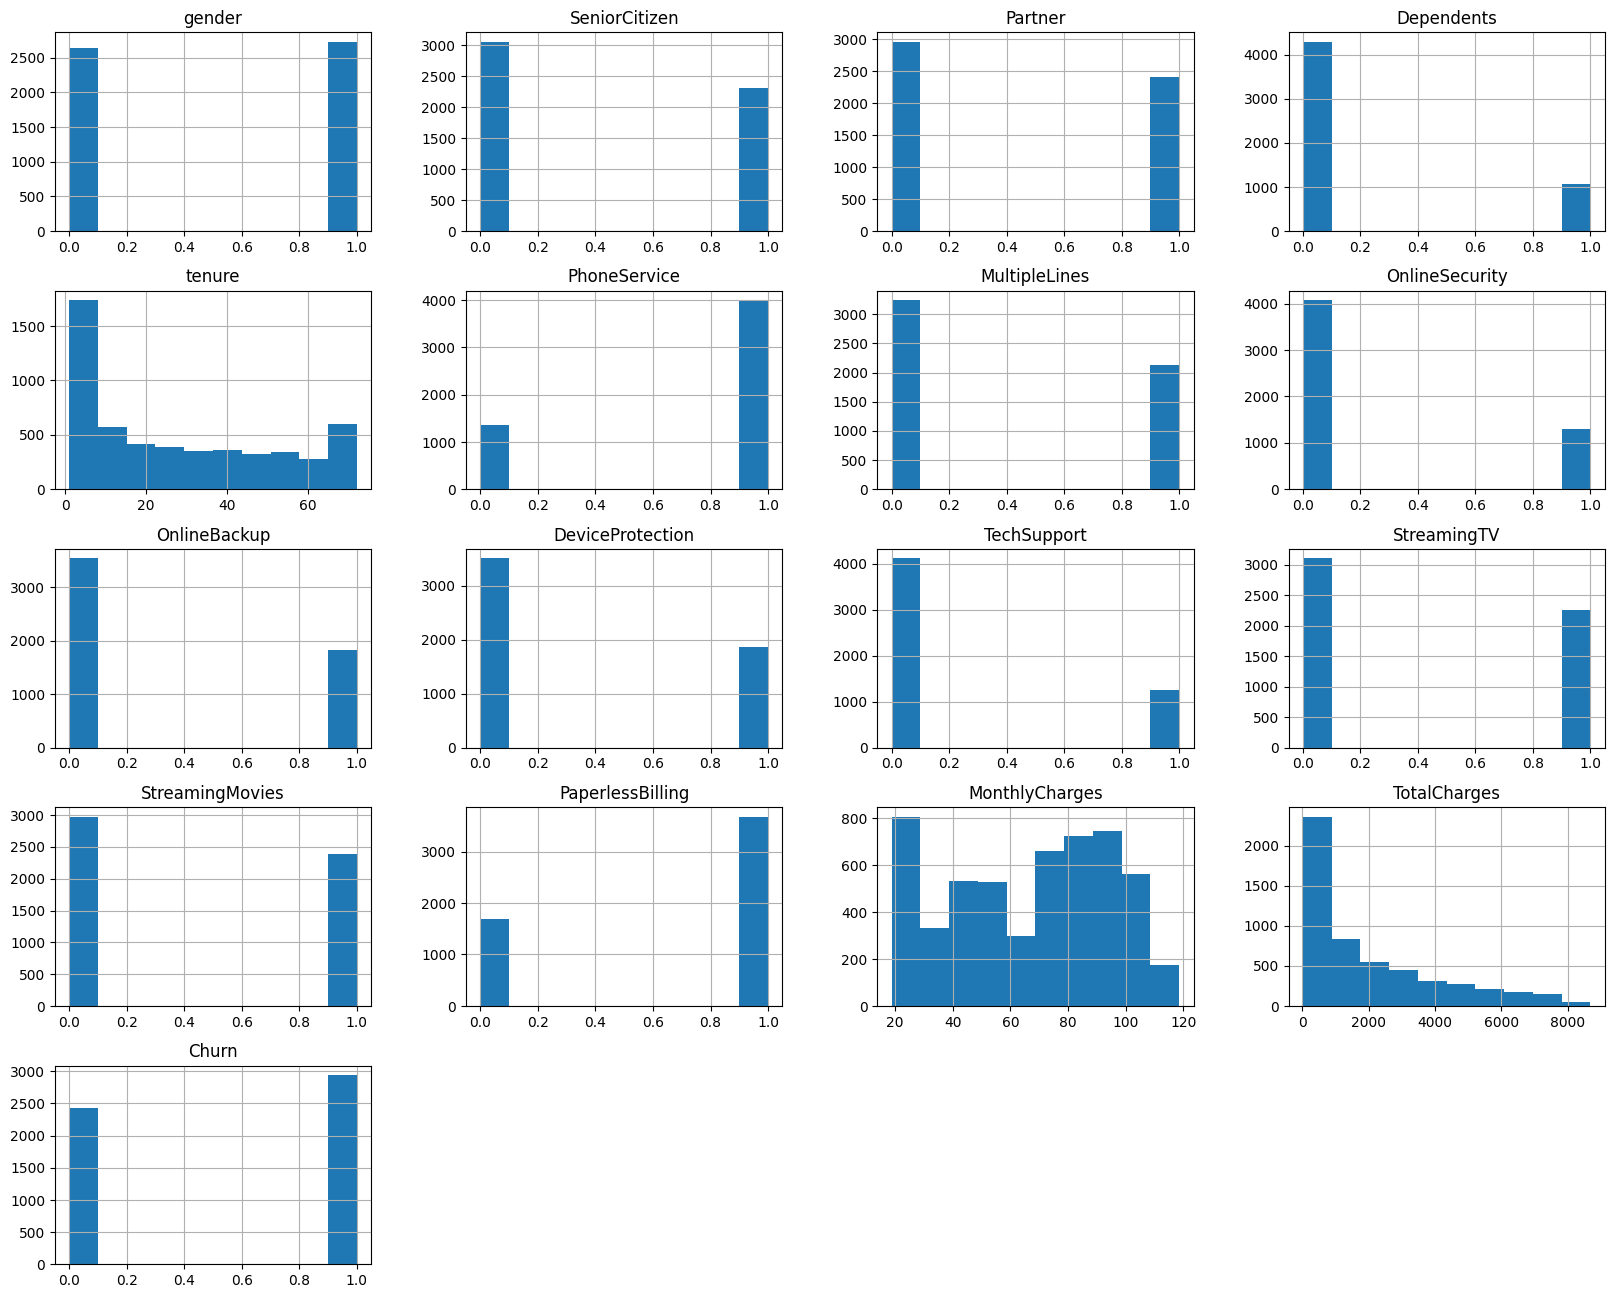

In [70]:
data.hist(figsize=(20,16))
plt.show()

In [72]:
data.to_csv('../../data/data_preprocessing_done.csv')